In [1]:
import sys
import os
sys.path.append('../src')

from sentiment import preprocess_text, get_sentiment, get_vader_sentiment, analyze_sentiment_keywords

import pandas as pd

[nltk_data] Downloading package punkt to /home/pemo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pemo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pemo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/pemo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#import dependencies
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns


#sentiment analysis
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#keyword Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#visuals
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/pemo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pemo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pemo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/pemo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# Import cleaned CSV
dfAbyssinia = pd.read_csv('../data/abysinia_cleaned_csv.csv')
dfDashen = pd.read_csv('../data/dashen_cleaned_csv.csv')
dfCommercial = pd.read_csv('../data/commercial_cleaned_csv.csv')

# Preprocess reviews
dfAbyssinia['processed_review'] = dfAbyssinia['review_text'].apply(preprocess_text)
dfCommercial['processed_review'] = dfCommercial['review_text'].apply(preprocess_text)
dfDashen['processed_review'] = dfDashen['review_text'].apply(preprocess_text)

# Apply TextBlob sentiment
dfAbyssinia['sentiment'] = dfAbyssinia['processed_review'].apply(get_sentiment)
dfCommercial['sentiment'] = dfCommercial['processed_review'].apply(get_sentiment)
dfDashen['sentiment'] = dfDashen['processed_review'].apply(get_sentiment)

# Apply VADER sentiment analysis
dfAbyssinia['vader_sentiment'] = dfAbyssinia['review_text'].apply(get_vader_sentiment)
dfCommercial['vader_sentiment'] = dfCommercial['review_text'].apply(get_vader_sentiment)
dfDashen['vader_sentiment'] = dfDashen['review_text'].apply(get_vader_sentiment)


In [4]:
pd.concat([dfAbyssinia.head(),dfDashen.head(),dfCommercial.head()])

,review_text,rating,date,bank_name,source,processed_review,sentiment,vader_sentiment
0,it's not working,3,2025-06-05,Bank of Abysinia,Google Play,working,neutral,neutral
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abysinia,Google Play,hello facing problem boa mobile app every time...,positive,negative
2,exceptional,5,2025-06-03,Bank of Abysinia,Google Play,exceptional,positive,neutral
3,BoA Mobile good bank,5,2025-06-02,Bank of Abysinia,Google Play,boa mobile good bank,positive,positive
4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abysinia,Google Play,worest app loading,neutral,neutral
0,love,3,2025-06-06,Dashen Bank of Ethiopia,Google Play,love,positive,positive
1,መቸሸጠ,5,2025-06-03,Dashen Bank of Ethiopia,Google Play,መቸሸጠ,neutral,neutral
2,wow,5,2025-06-03,Dashen Bank of Ethiopia,Google Play,wow,positive,positive
3,gadaa,5,2025-06-01,Dashen Bank of Ethiopia,Google Play,gadaa,neutral,neutral
4,Massive upgrade from the Amole app.,5,2025-05-31,Dashen Bank of Ethiopia,Google Play,massive upgrade amole app,neutral,neutral


### Visualizing the Results
Visualizations:

* Bar Chart: Show the distribution of positive, negative, and neutral sentiments.
* Word Cloud: Visualize frequent keywords in positive and negative reviews.

### Combining Sentiment Analysis and Keyword Extraction
Description: Analyze keywords in positive vs. negative reviews to understand user preferences and issues.

Top Keywords in Bank of Abyssinia Positive Reviews: ['app' 'bank' 'banking' 'best' 'boa' 'good' 'mobile' 'please' 'use' 'work']
Top Keywords in Bank of Abyssinia Negative Reviews: ['app' 'bank' 'banking' 'ever' 'mobile' 'please' 'time' 'update' 'work'
 'worst']


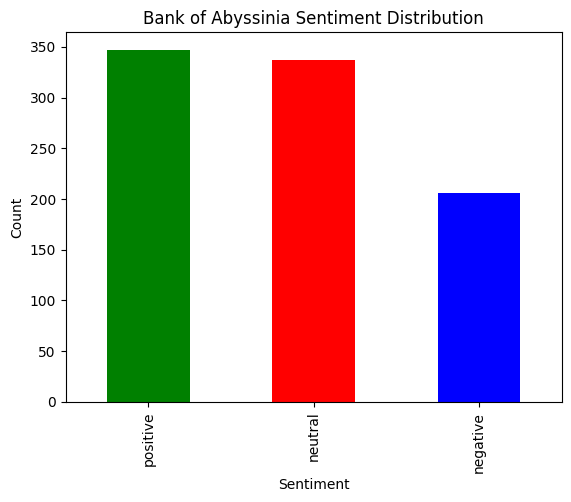

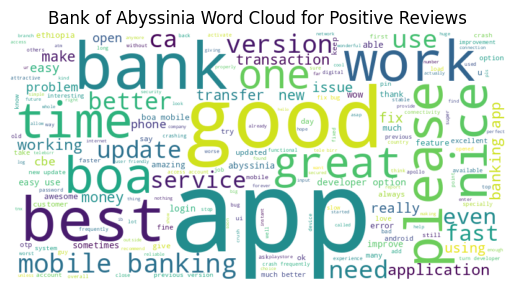

In [5]:
analyze_sentiment_keywords(dfAbyssinia, title_prefix="Bank of Abyssinia",exportName="BOA")

Top Keywords in Commercial Bank of Ethiopia Positive Reviews: ['app' 'application' 'bank' 'best' 'cbe' 'easy' 'good' 'nice'
 'transaction' 'use']
Top Keywords in Commercial Bank of Ethiopia Negative Reviews: ['app' 'bad' 'bank' 'cbe' 'make' 'money' 'time' 'transaction' 'update'
 'worst']


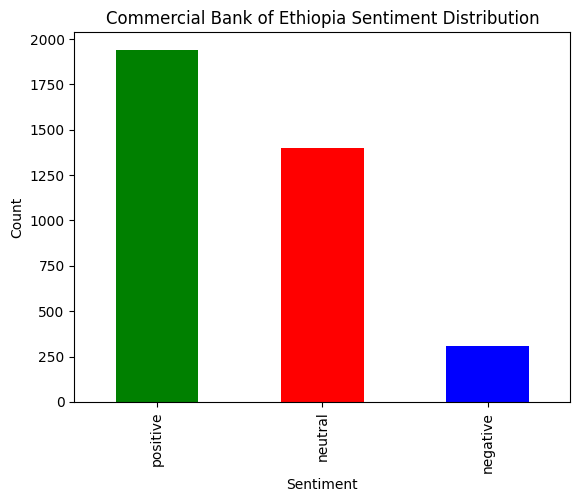

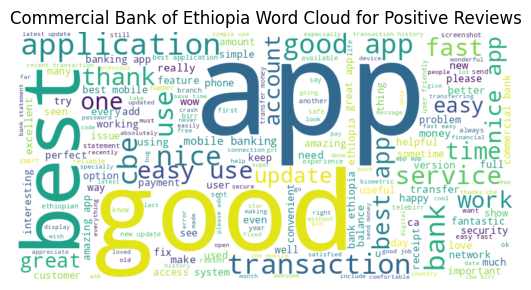

In [6]:
analyze_sentiment_keywords(dfCommercial, title_prefix="Commercial Bank of Ethiopia",exportName="Commercial")

Top Keywords in Dashen Bank Positive Reviews: ['app' 'bank' 'banking' 'best' 'dashen' 'fast' 'feature' 'one' 'super'
 'use']
Top Keywords in Dashen Bank Negative Reviews: ['app' 'bank' 'banking' 'disappointing' 'ever' 'experience' 'need' 'slow'
 'time' 'transaction']


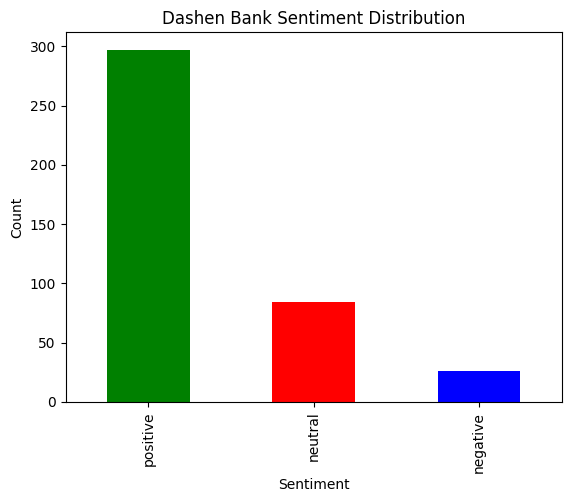

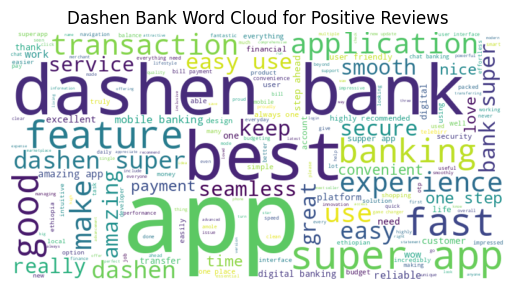

In [7]:
analyze_sentiment_keywords(dfDashen, title_prefix="Dashen Bank",exportName="Dashen")

Aggregate by bank and rating

In [8]:
# Combine into one DataFrame
df = pd.concat([dfAbyssinia, dfCommercial, dfDashen], ignore_index=True)
sentiment_map = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}

df['sentiment_score'] = df['sentiment'].str.lower().map(sentiment_map)


                      bank_name  rating  sentiment_score
0              Bank of Abysinia       1        -0.199029
1              Bank of Abysinia       2         0.039216
2              Bank of Abysinia       3         0.232143
3              Bank of Abysinia       4         0.526316
4              Bank of Abysinia       5         0.564565
5   Commercial Bank of Ethiopia       1        -0.042042
6   Commercial Bank of Ethiopia       2         0.082418
7   Commercial Bank of Ethiopia       3         0.429752
8   Commercial Bank of Ethiopia       4         0.608955
9   Commercial Bank of Ethiopia       5         0.602339
10      Dashen Bank of Ethiopia       1         0.029412
11      Dashen Bank of Ethiopia       2        -0.176471
12      Dashen Bank of Ethiopia       3         0.583333
13      Dashen Bank of Ethiopia       4         0.636364
14      Dashen Bank of Ethiopia       5         0.782609
sentiment                    bank_name  rating  negative  neutral  positive
0           

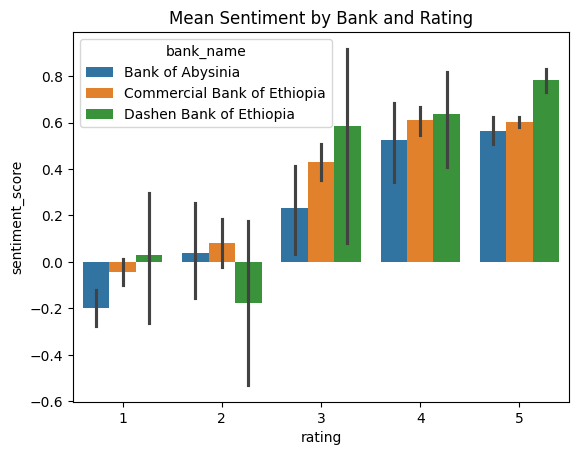

In [9]:
# Mean sentiment per bank per rating
agg_df = df.groupby(['bank_name', 'rating'])['sentiment_score'].mean().reset_index()
print(agg_df)
# Count of each sentiment per bank and rating
agg_df = df.groupby(['bank_name', 'rating', 'sentiment']).size().unstack(fill_value=0).reset_index()
print(agg_df)
sns.barplot(data=df, x='rating', y='sentiment_score', hue='bank_name')
plt.title('Mean Sentiment by Bank and Rating')

# Export
output_path="../output/MeanSentiment.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path)

plt.show()




<Axes: xlabel='sentiment', ylabel='count'>

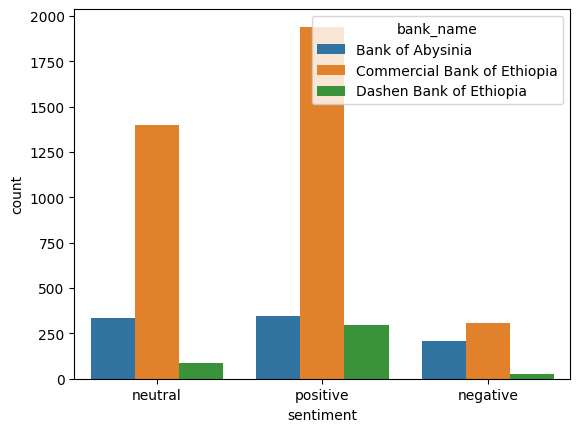

In [10]:
# Sentiment Bar Chart
sns.countplot(data=df, x='sentiment', hue='bank_name')

<Axes: xlabel='rating', ylabel='Count'>

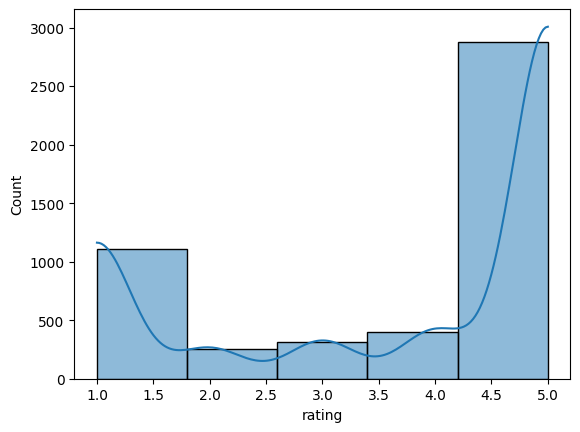

In [11]:
# Rating Distribution
sns.histplot(data=df, x='rating', bins=5, kde=True)

<Axes: xlabel='date', ylabel='rating'>

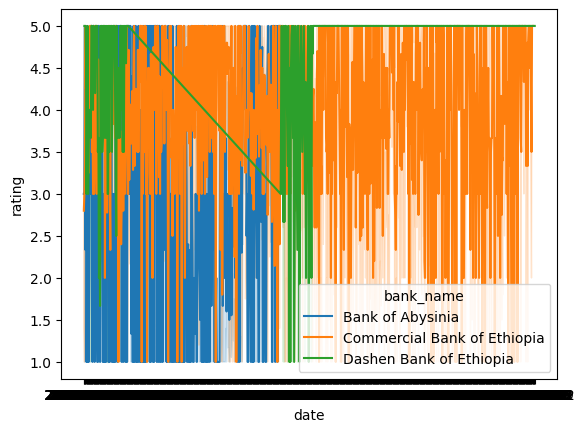

In [15]:
#  Sentiment Over Time
sns.lineplot(data=df, x='date', y='rating', hue='bank_name')